In [2]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# observed data
np.random.seed(123)
n = 11
_a = 0.5
_b = 0.1
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)*0.05

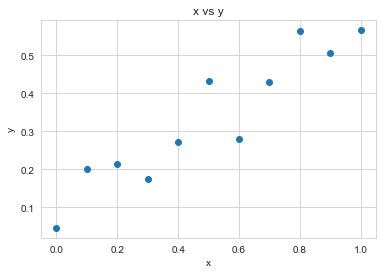

In [4]:
# plot results
plt.scatter(x, y)
#plt.plot(x, y_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')
plt.show()

In [5]:
niter = 500
with pm.Model() as linreg:
    a = pm.Normal('a', mu=_a, sigma=20)
    b = pm.Normal('b', mu=_b, sigma=20)
    sigma = pm.HalfCauchy('sigma',beta=10, testval=1.0)

    y_est = a*x + b
    likelihood = pm.Normal('y', mu=y_est, sigma=sigma, observed=y)

    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    #trace = pm.sample(niter, step, start, random_seed=123)
    trace = pm.sample(niter)

C:\Users\U230261\AppData\Local\Temp\ipykernel_7368\280693582.py:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(niter)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 68 seconds.


Could not locate executable g77
Could not locate executable f77
Could not locate executable ifort
Could not locate executable ifl
Could not locate executable f90
Could not locate executable efl


WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6537902375305797, but should be close to 0.8. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6573602524607004, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
C:\devsbb\Anaconda3\envs\pymc_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'a'}>,
       <AxesSubplot:title={'center':'b'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

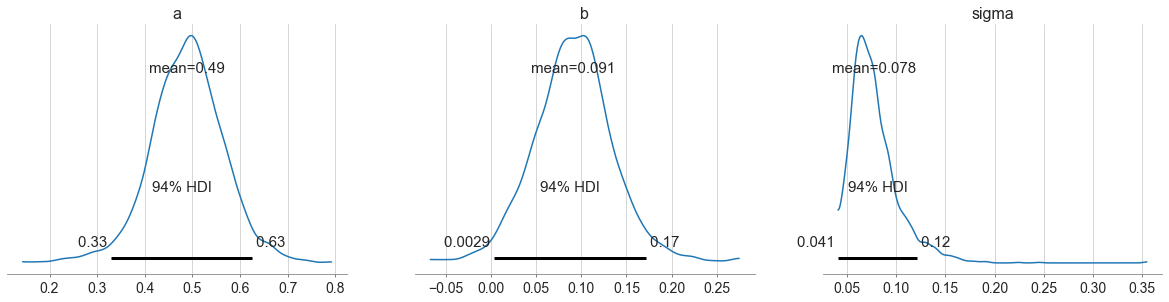

In [6]:
az.plot_posterior(trace)

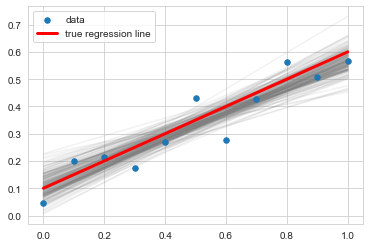

In [7]:
plt.scatter(x, y, s=30, label='data',zorder=2)
for a_, b_ in zip(trace['a'][-200:], trace['b'][-200:]):
    plt.plot(x, a_*x + b_, c='gray', alpha=0.1,zorder=1)
plt.plot(x, _a*x + _b, label='true regression line', lw=3., c='red')
plt.legend(loc='best')
pass

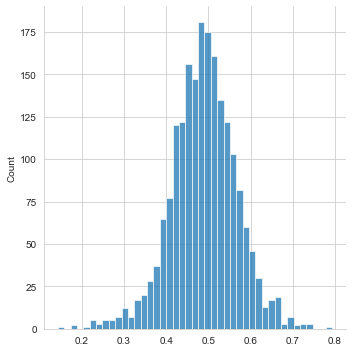

In [8]:
sns.displot(trace['a'])

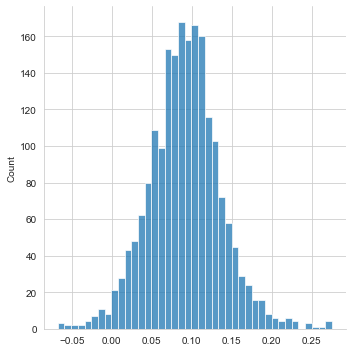

In [9]:
sns.displot(trace['b'])

In [10]:
tlim0 = np.zeros(trace['a'].size)

In [11]:
for (i,(a,b)) in enumerate(zip(trace['a'], trace['b'])):
    tlim0[i] = (1.0 - b)/a

In [12]:
xstart,median,xend = np.percentile(tlim0, [1,50,95])

In [13]:
median

1.8538854013967647

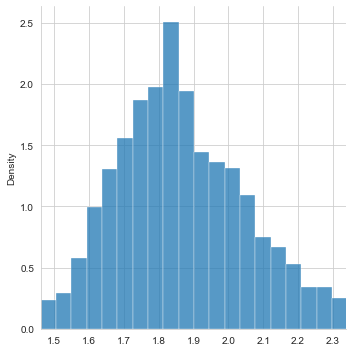

In [14]:
sns.displot(tlim0, kde=False,rug=False,stat = "density")
plt.xlim(xstart,xend)
plt.show()

In [15]:
percentiles = [5, 25, 50, 75, 95]

5ntile=	1.5795314448367783
25ntile=	1.7355385861721395
50ntile=	1.8538854013967647
75ntile=	2.0136395994154235
95ntile=	2.336534770059592


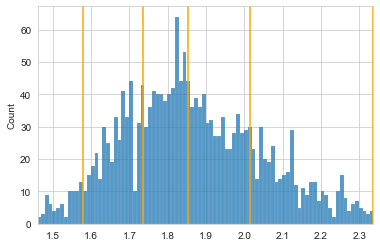

In [16]:
ax = sns.histplot(tlim0, binwidth=0.01)
for (p,q) in zip(percentiles, np.percentile(tlim0, percentiles)):
    plt.xlim(xstart,xend)
    plt.axvline(q, color='orange')
    print(str(p)+"ntile=\t"+str(q))
plt.show()

In [17]:
# wahrer Wert
(1.0 - _b)/_a

1.8